In [1]:
%load_ext autoreload
%autoreload 2

## Unsupervised Learning and Extraction of Blinking Patterns

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import ebpm

### Data Loading

In [3]:
ear_data = pd.read_csv('data/sample_ear_short.csv')
display(ear_data.head())

ear_l = ear_data['EAR_l'].values
ear_r = ear_data['EAR_r'].values

,Frame,EAR_r,EAR_l
0,0,0.286274,0.269362
1,1,0.291212,0.268412
2,2,0.291212,0.269362
3,3,0.297798,0.270195
4,4,0.291479,0.269233


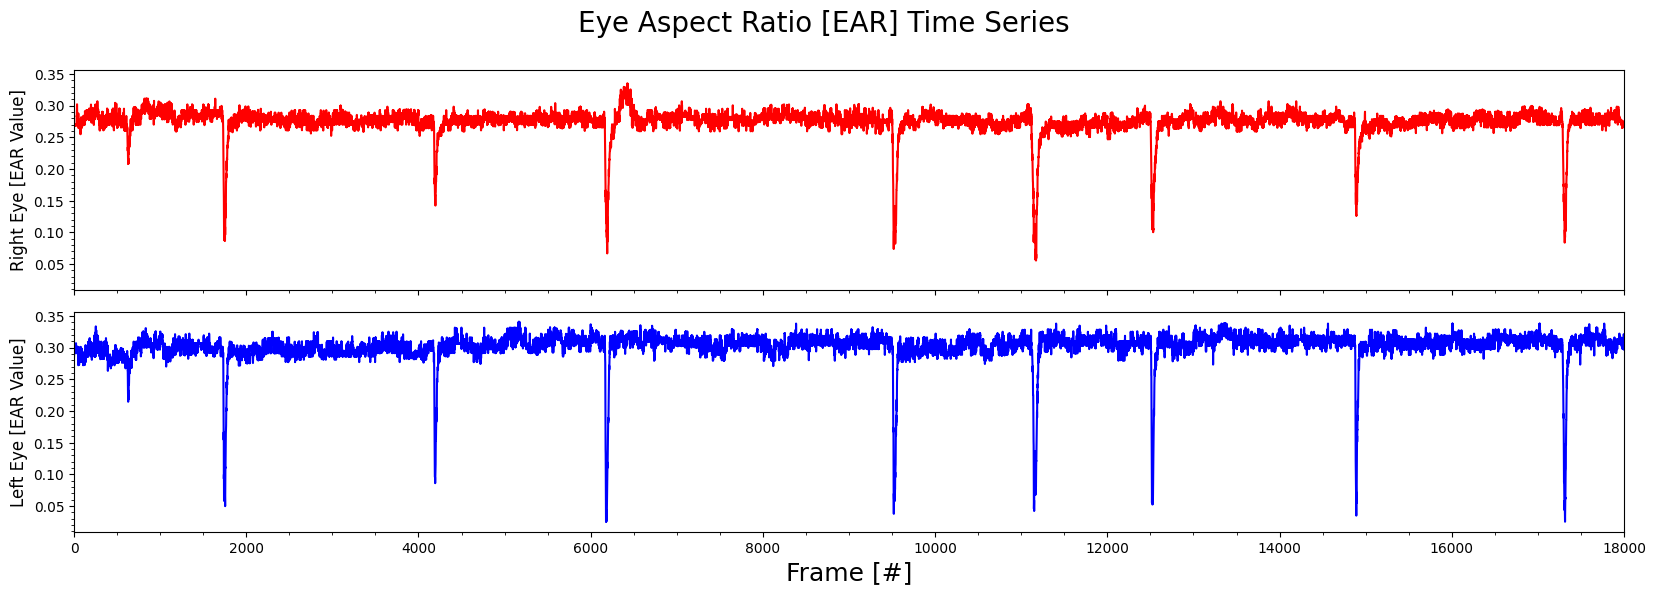

In [4]:
ebpm.plot.ear_time_series(ear_l, ear_r)
plt.show()

### Unsupervised Learning of Blinking State

In [19]:
candidates = ebpm.unsupervised.extract_candidates(np.concatenate([ear_l, ear_r]))

In [20]:
prototype = candidates[0]

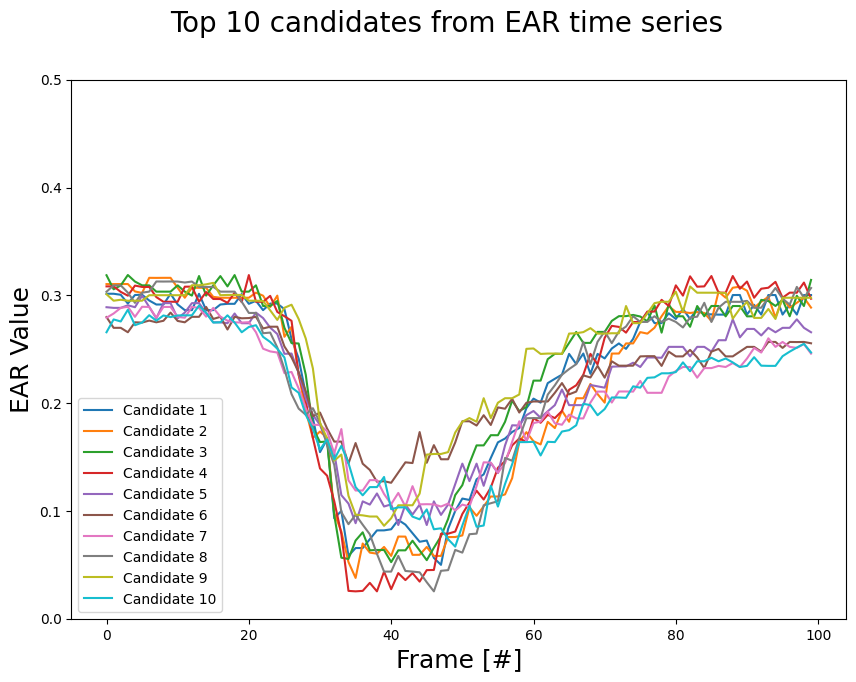

In [21]:
ebpm.plot.candidates_overview(candidates=candidates)
plt.show()

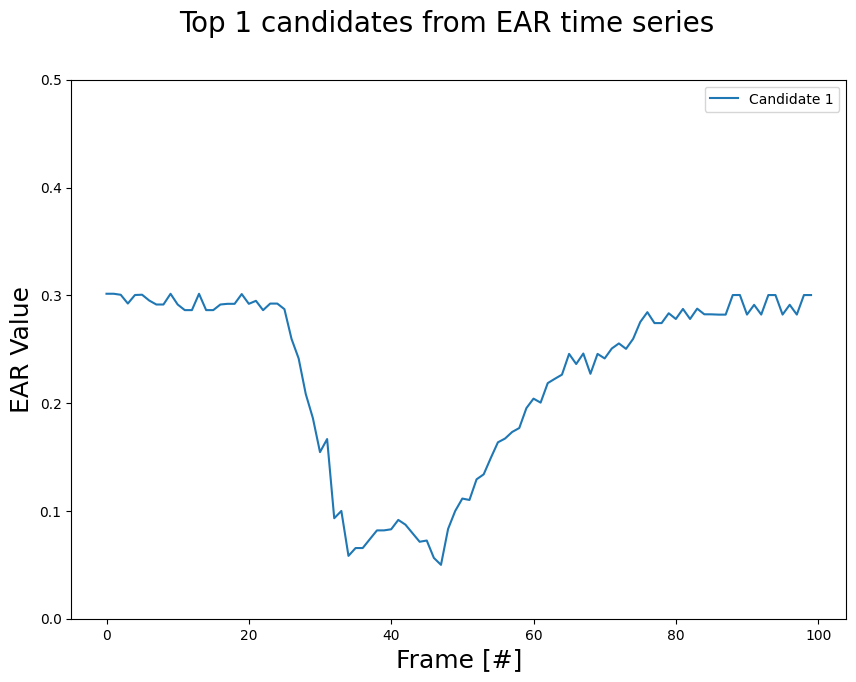

In [22]:
ebpm.plot.candidates_overview(candidates=prototype)
plt.show()

### Detection of the Prototype in the Time Series

In [38]:
matches_l = ebpm.match.find_prototype(ear_l, prototype, max_prototype_distance=3.0)
matches_r = ebpm.match.find_prototype(ear_r, prototype, max_prototype_distance=3.0)

In [39]:
ebpm.match.describe(matches_l)

Contains 11 matches
Matches: [[591, 691, 4.54211799664586], [1709, 1809, 2.1264802266890244], [4155, 4255, 2.7390968929682145], [6145, 6245, 3.1460980163222034], [6689, 6789, 7.64305367267573], [9487, 9587, 4.739295662054528], [11118, 11218, 5.550462616380028], [11973, 12073, 7.409097990229975], [12485, 12585, 3.2583760763760066], [14852, 14952, 2.9444718535223777], [17270, 17370, 3.4382259360712535]]


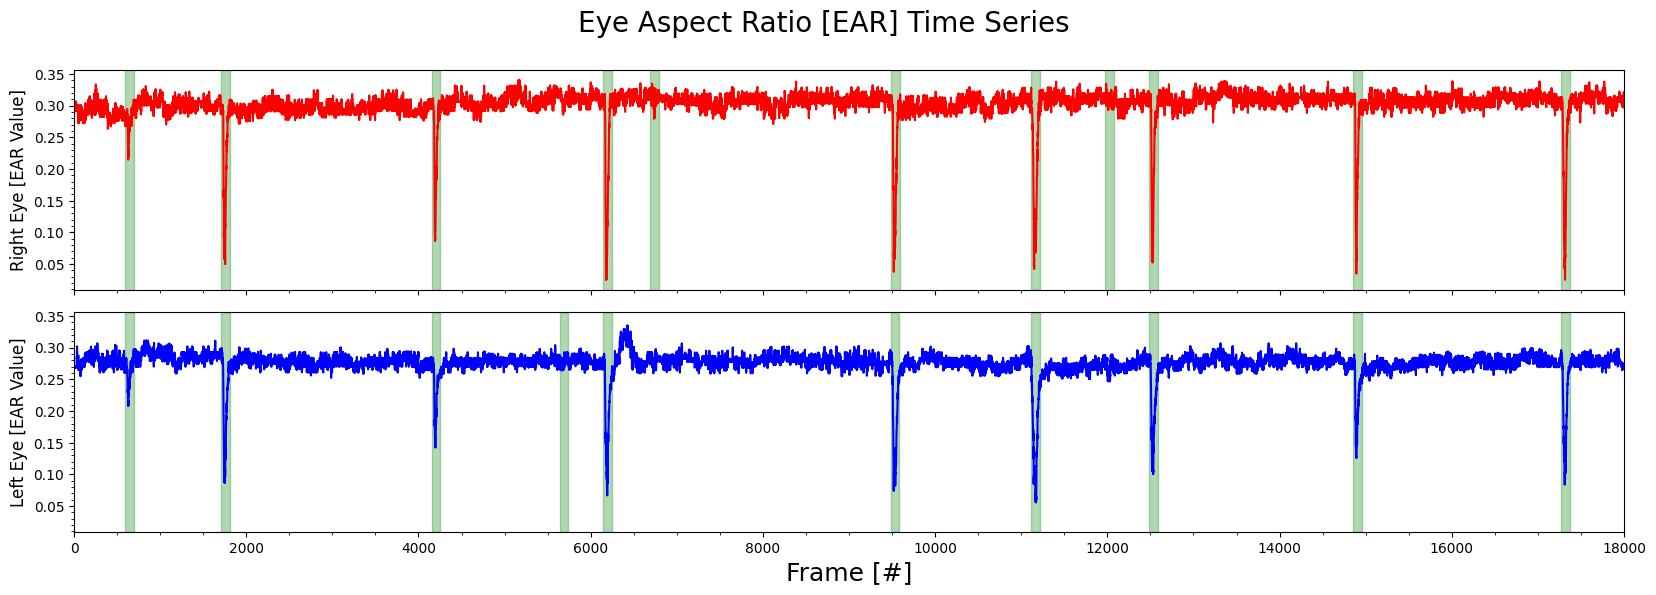

In [40]:
ebpm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

#### Sync the matches between the eyes

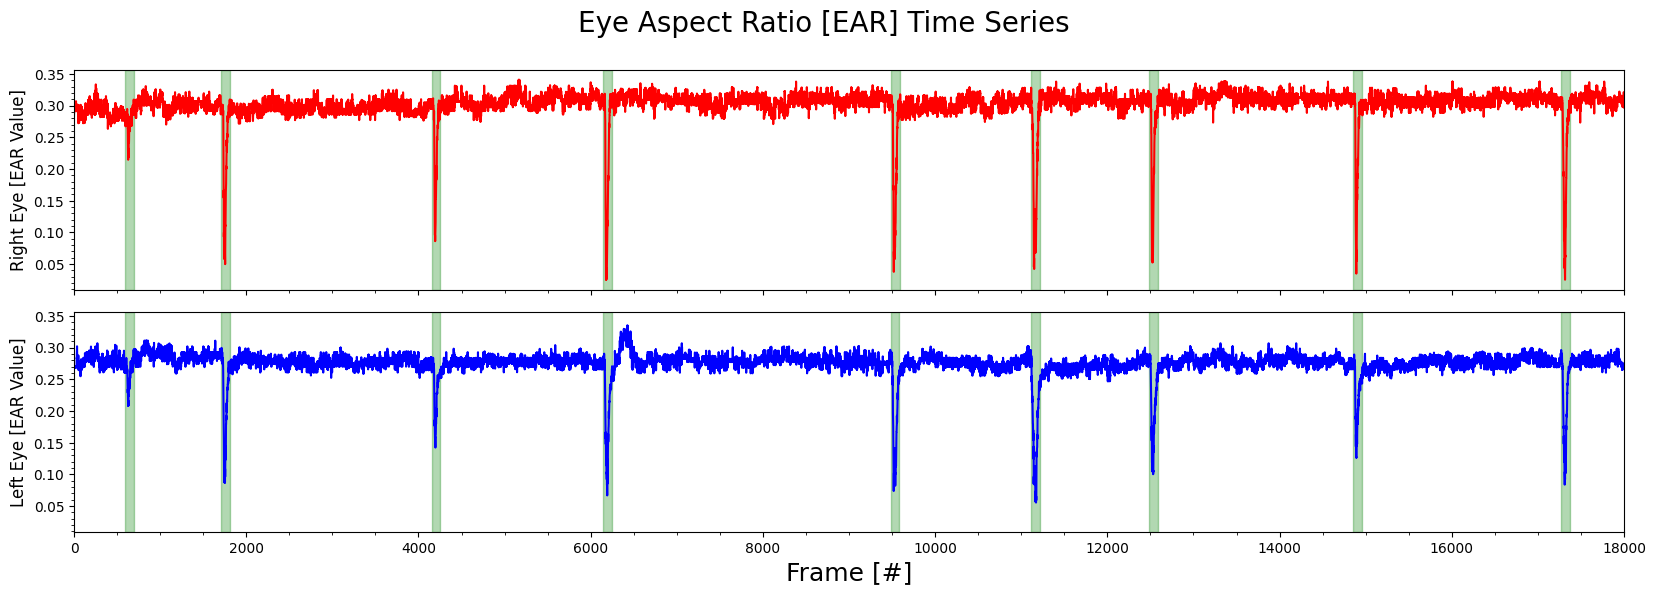

In [12]:
matches_l = ebpm.match.find_prototype(ear_l, prototype)
matches_r = ebpm.match.find_prototype(ear_r, prototype)
matches_l, matches_r = ebpm.match.index_matching(matches_l, matches_r)
ebpm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

### Compare different windwo sizes

#### 50

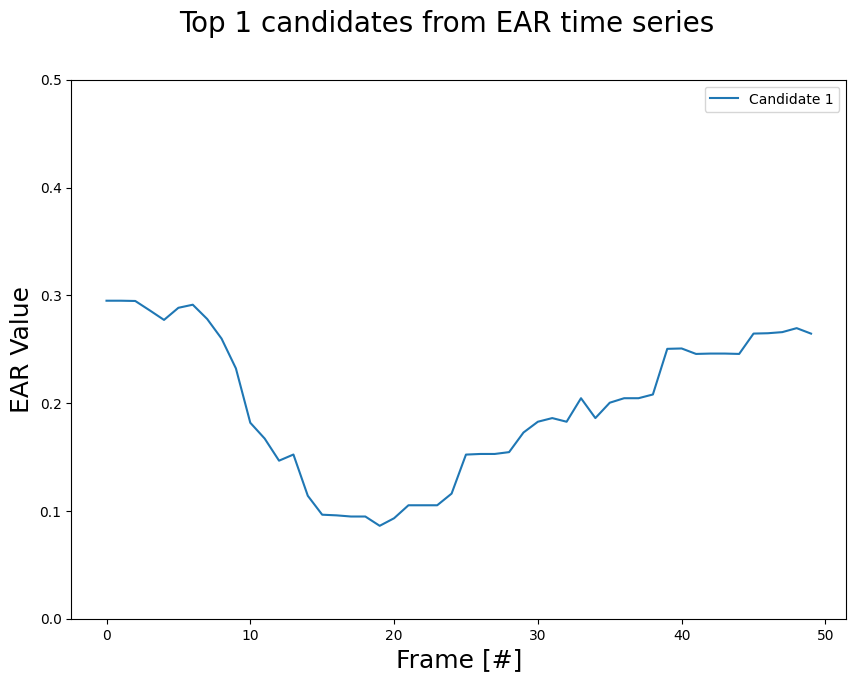

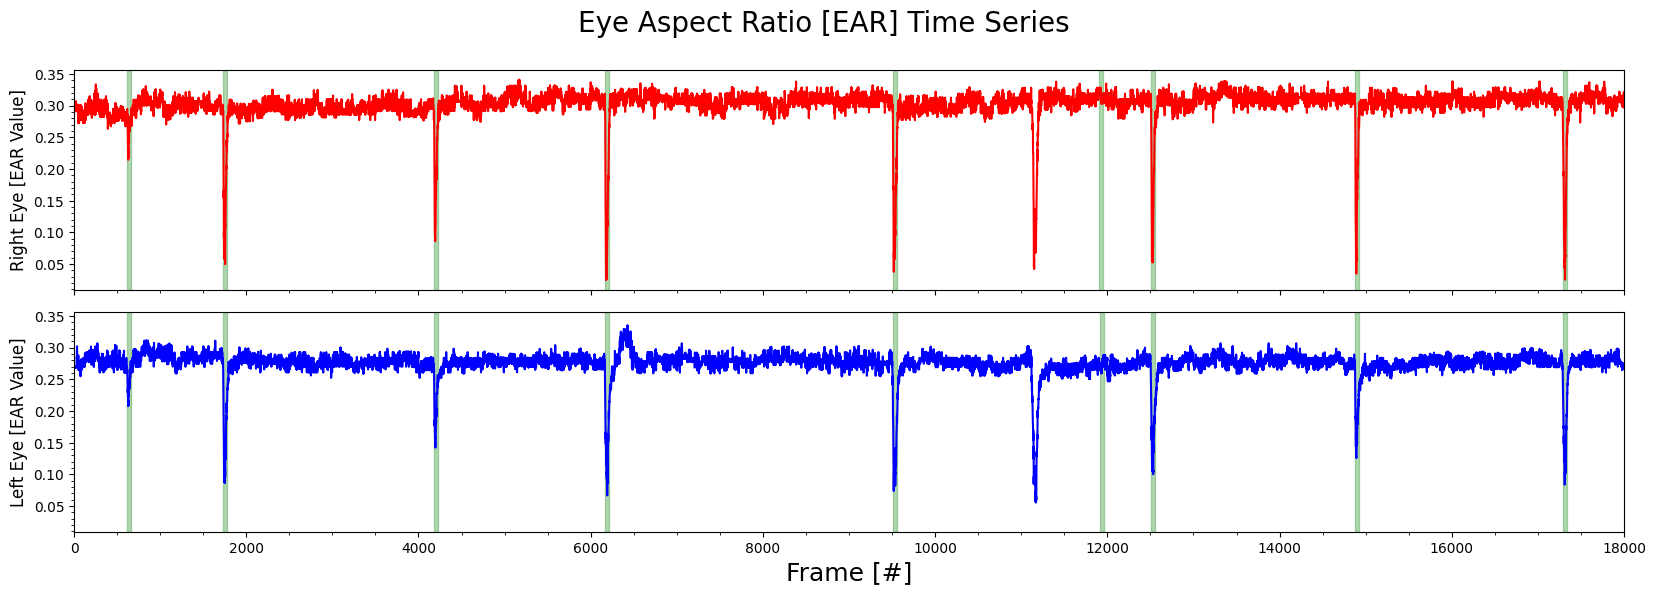

In [41]:
candidates = ebpm.unsupervised.extract_candidates(np.concatenate([ear_l, ear_r]), window_length=50)
prototype = candidates[0]
ebpm.plot.candidates_overview(candidates=prototype)
matches_l = ebpm.match.find_prototype(ear_l, prototype)
matches_r = ebpm.match.find_prototype(ear_r, prototype)
matches_l, matches_r = ebpm.match.index_matching(matches_l, matches_r)
ebpm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

#### 100

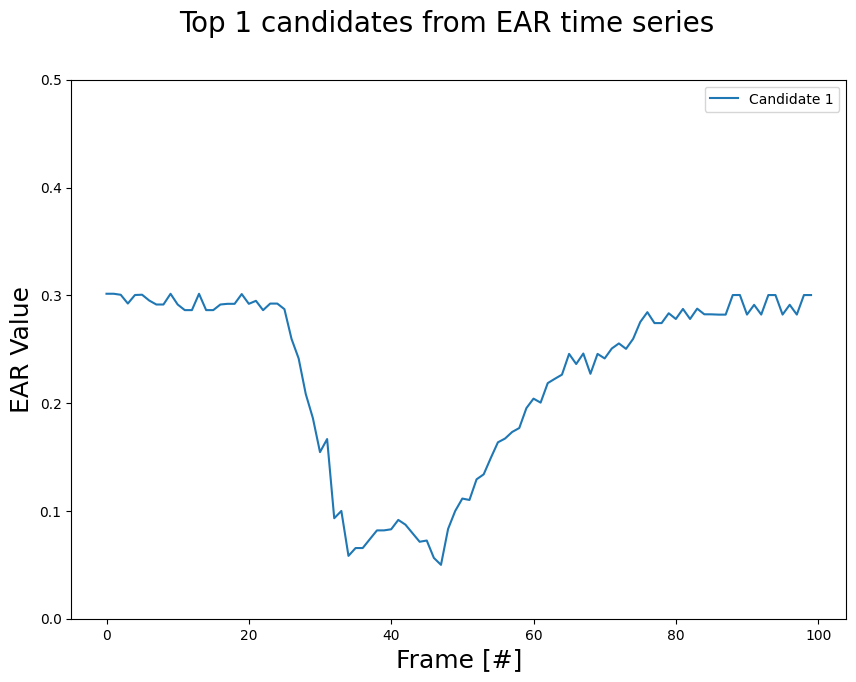

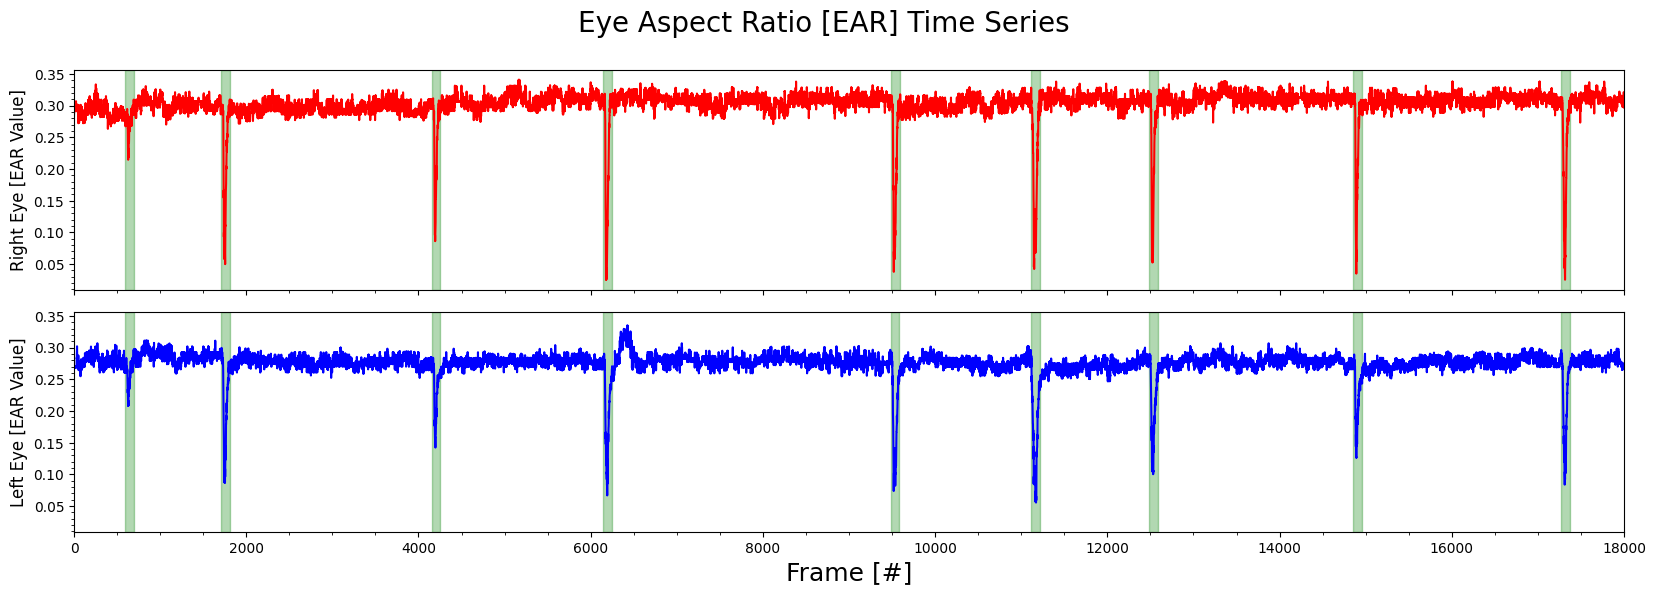

In [42]:
candidates = ebpm.unsupervised.extract_candidates(np.concatenate([ear_l, ear_r]), window_length=100)
prototype = candidates[0]
ebpm.plot.candidates_overview(candidates=prototype)
matches_l = ebpm.match.find_prototype(ear_l, prototype)
matches_r = ebpm.match.find_prototype(ear_r, prototype)
matches_l, matches_r = ebpm.match.index_matching(matches_l, matches_r)
ebpm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

#### 200

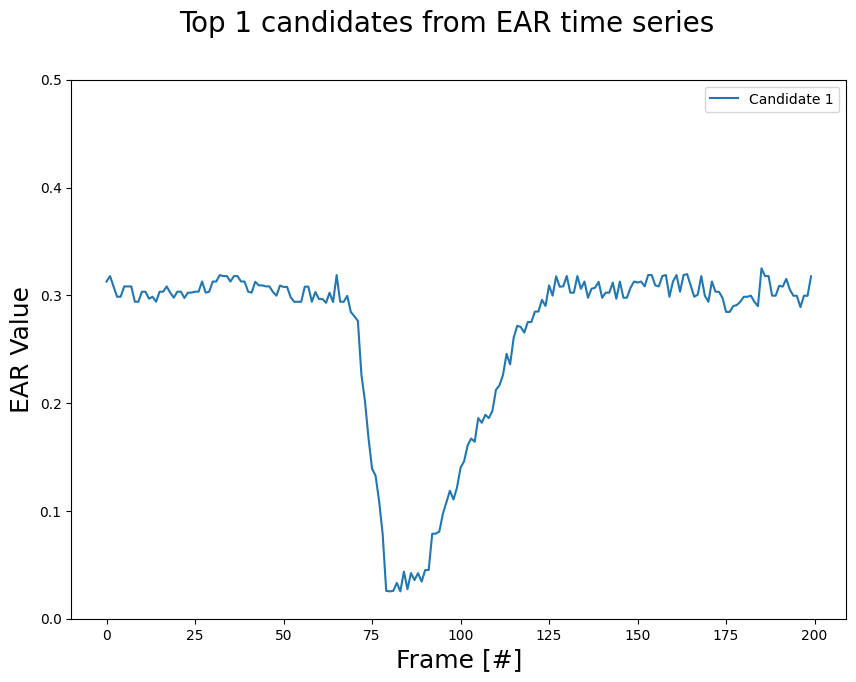

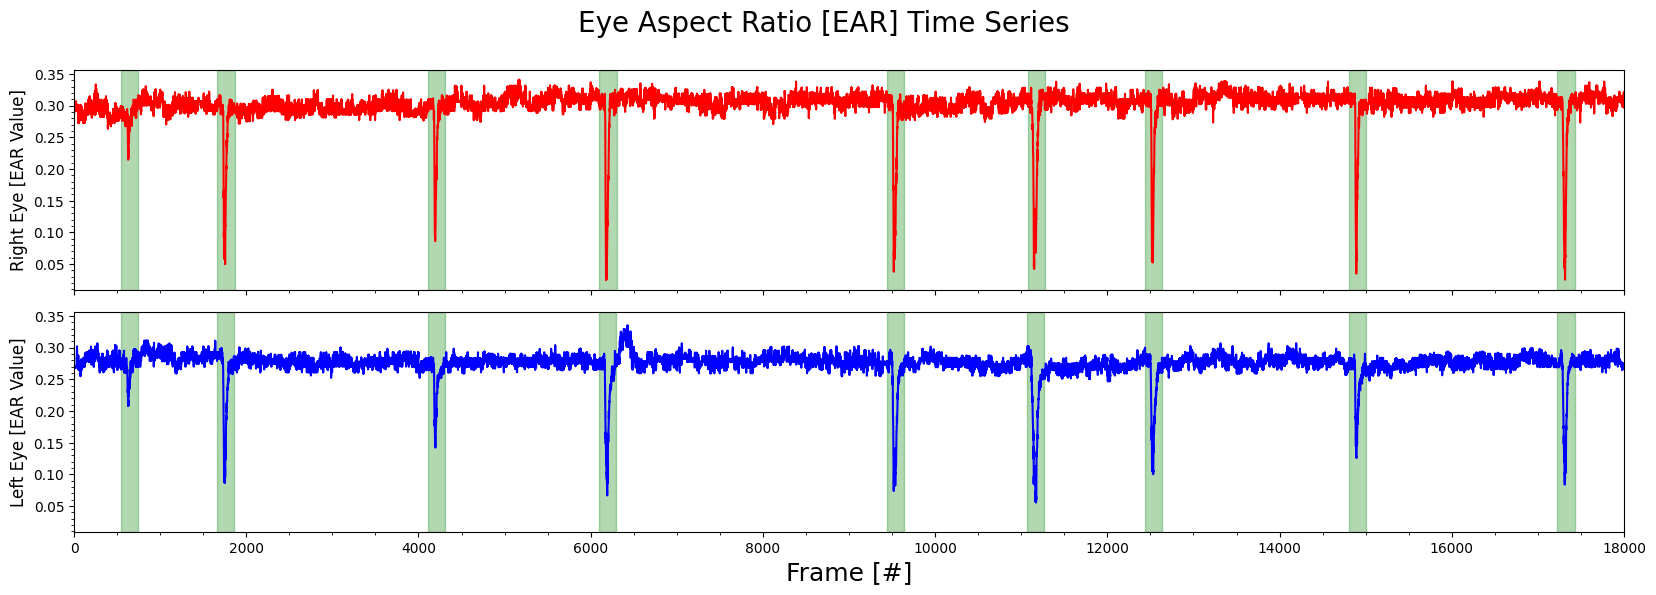

In [43]:
candidates = ebpm.unsupervised.extract_candidates(np.concatenate([ear_l, ear_r]), window_length=200)
prototype = candidates[0]
ebpm.plot.candidates_overview(candidates=prototype)
matches_l = ebpm.match.find_prototype(ear_l, prototype)
matches_r = ebpm.match.find_prototype(ear_r, prototype)
matches_l, matches_r = ebpm.match.index_matching(matches_l, matches_r)
ebpm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()